The sales data keeps the information of number of sales and advertising expenditure to its target audience. The purpose of project is to forecast the amount ofproduct that customers will purchase on the basis of its advertisement. After necessary preprocessing, the future sales are predicted by machine learning model i.e, gradient boost model (XGBoost), Support Vector Regression (SVR), and K-Nearest Neighbor (KNN). The model performance is evaluated by goodness of fit criterias to see which is the best fitted model based on provided sales data.  

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [93]:
sales = pd.read_csv("C:\\Users\\Is computer\\Desktop\\Codsoft\\Sales Prediction\\advertising.csv")
print(sales.shape)
sales.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [34]:
sales.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [35]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [36]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

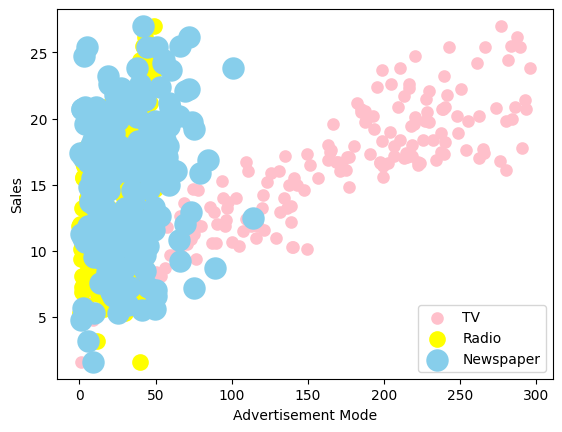

In [43]:
plt.scatter(sales['TV'], sales['Sales'], c ="pink", 
            linewidths = 2, 
            s = 50)
 
plt.scatter(sales['Radio'], sales['Sales'], c ="yellow",
            linewidths = 2, 
            s = 100)

plt.scatter(sales['Newspaper'], sales['Sales'], c ="skyblue",
            linewidths = 2, 
            s = 200)

plt.xlabel("Advertisement Mode")
plt.ylabel("Sales")
plt.legend(labels = ['TV', 'Radio', 'Newspaper'])
plt.show()

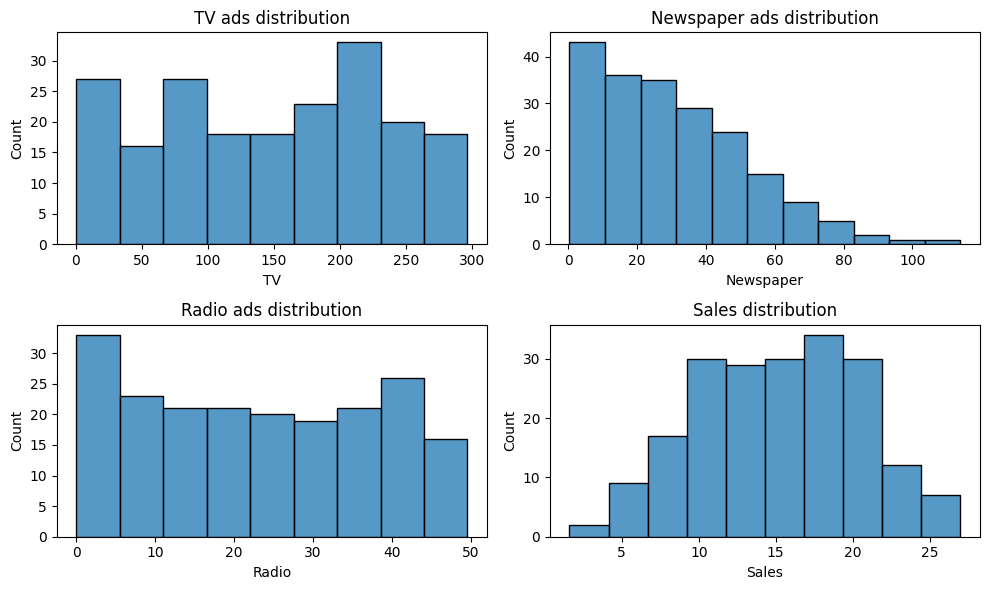

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(x='TV', data=sales, ax=axes[0, 0])
axes[0, 0].set_title('TV ads distribution')

sns.histplot(x='Radio', data=sales, ax=axes[1, 0])
axes[1, 0].set_title('Radio ads distribution')

sns.histplot(x='Newspaper', data=sales, ax=axes[0, 1])
axes[0, 1].set_title('Newspaper ads distribution')

sns.histplot(x='Sales', data=sales, ax=axes[1, 1])
axes[1, 1].set_title('Sales distribution')

plt.tight_layout()
plt.show()


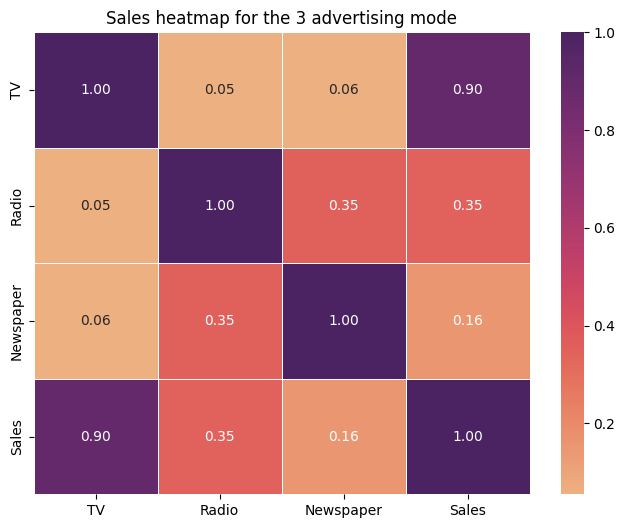

In [66]:
#Creating a heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = sales.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt='.2f', linewidths=0.5)
plt.title('Sales heatmap for the 3 advertising mode')
plt.show()



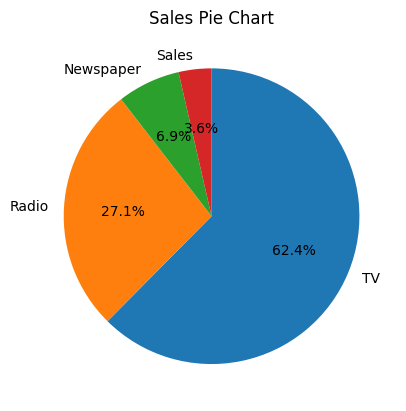

In [69]:
# Create bins
bins = [0, 25, 50, 75, 100]

# Use numpy's histogram function to count data points in each bin
hist, _ = np.histogram(sales, bins=bins)

# Calculate percentages
percentages = (hist / len(sales)) * 100

# Labels for each bin
#labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
labels = ['TV','Radio','Newspaper','Sales']
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Sales Pie Chart')

plt.show()


In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error


y = sales['Sales']
x = sales.drop('Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2)

# Create a KNN regressor with k=3
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Accuracy: {accuracy:.2f}")

# Display classification report
#print("Classification Report:")
#print(classification_report(y_test, y_pred))


Mean Squared Error: 2.19


In [99]:
#SVM regression
from sklearn.svm import SVR
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svm_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 4.27
